In [21]:
import pandas as pd
import os
import wordcloud
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [29]:
import nltk

In [14]:
!pip install prettytable 

In [7]:
df = pd.read_csv('tweets_df.csv')
df

,author,content,country,date_time,id,language,latitude,longitude,number_of_likes,number_of_shares
0,katyperry,Is history repeating itself...?#DONTNORMALIZEH...,NaN,12/01/2017 19:52,8.196330e+17,en,NaN,NaN,7900,3472
1,katyperry,@barackobama Thank you for your incredible gra...,NaN,11/01/2017 08:38,8.191010e+17,en,NaN,NaN,3689,1380
2,katyperry,Life goals. https://t.co/XIn1qKMKQl,NaN,11/01/2017 02:52,8.190140e+17,en,NaN,NaN,10341,2387
3,katyperry,Me right now 🙏🏻 https://t.co/gW55C1wrwd,NaN,11/01/2017 02:44,8.190120e+17,en,NaN,NaN,10774,2458
4,katyperry,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,NaN,10/01/2017 05:22,8.186890e+17,en,NaN,NaN,17620,4655
...,...,...,...,...,...,...,...,...,...,...
52537,ddlovato,Life couldn't be better right now. 😊,NaN,06/01/2015 23:10,5.526030e+17,en,NaN,NaN,32799,23796
52538,ddlovato,First Monday back in action. I'd say 21.6 mile...,NaN,06/01/2015 02:17,5.522880e+17,en,NaN,NaN,21709,12511
52539,ddlovato,"Crime shows, buddy, snuggles = the perfect Sun...",NaN,05/01/2015 03:42,5.519470e+17,en,NaN,NaN,25269,15583
52540,ddlovato,❄️ http://t.co/sHCFdPpGPa,NaN,05/01/2015 00:06,5.518920e+17,und,NaN,NaN,15985,10456


In [10]:

# Step 1: Handling Missing Values
# Fill missing values in numeric columns with mean
df.fillna(df.mean(), inplace=True)

# Step 2: Removing Duplicates
df.drop_duplicates(inplace=True)

# Step 3: Standardizing Text Data
# Convert text data to lowercase
df['content'] = df['content'].str.lower()

# Step 4: Verify No NaN
# Check if any column contains NaN values
if df.isnull().values.any():
    print("Warning: NaN values detected!")

# Step 5: Ensure Data Integrity (Example: Check if likes are non-negative)
if (df['number_of_likes'] < 0).any():
    print("Error: Negative likes found!")
    
df

C:\Users\ygree\AppData\Local\Temp\ipykernel_35172\4116396046.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


,author,content,country,date_time,id,language,latitude,longitude,number_of_likes,number_of_shares
0,katyperry,is history repeating itself...?#dontnormalizeh...,NaN,12/01/2017 19:52,8.196330e+17,en,37.776973,-122.416523,7900,3472
1,katyperry,@barackobama thank you for your incredible gra...,NaN,11/01/2017 08:38,8.191010e+17,en,37.776973,-122.416523,3689,1380
2,katyperry,life goals. https://t.co/xin1qkmkql,NaN,11/01/2017 02:52,8.190140e+17,en,37.776973,-122.416523,10341,2387
3,katyperry,me right now 🙏🏻 https://t.co/gw55c1wrwd,NaN,11/01/2017 02:44,8.190120e+17,en,37.776973,-122.416523,10774,2458
4,katyperry,sisters are doin' it for themselves! 🙌🏻💪🏻❤️ ht...,NaN,10/01/2017 05:22,8.186890e+17,en,37.776973,-122.416523,17620,4655
...,...,...,...,...,...,...,...,...,...,...
52537,ddlovato,life couldn't be better right now. 😊,NaN,06/01/2015 23:10,5.526030e+17,en,37.776973,-122.416523,32799,23796
52538,ddlovato,first monday back in action. i'd say 21.6 mile...,NaN,06/01/2015 02:17,5.522880e+17,en,37.776973,-122.416523,21709,12511
52539,ddlovato,"crime shows, buddy, snuggles = the perfect sun...",NaN,05/01/2015 03:42,5.519470e+17,en,37.776973,-122.416523,25269,15583
52540,ddlovato,❄️ http://t.co/shcfdppgpa,NaN,05/01/2015 00:06,5.518920e+17,und,37.776973,-122.416523,15985,10456


              author     content             country         date_time  \
count          52542       52542                  36             52542   
unique            20       52412                   2             49590   
top     TheEllenShow  i love you  Vereinigte Staaten  09/09/2016 23:16   
freq            3147          11                  25                 5   
mean             NaN         NaN                 NaN               NaN   
std              NaN         NaN                 NaN               NaN   
min              NaN         NaN                 NaN               NaN   
25%              NaN         NaN                 NaN               NaN   
50%              NaN         NaN                 NaN               NaN   
75%              NaN         NaN                 NaN               NaN   
max              NaN         NaN                 NaN               NaN   

                  id language      latitude     longitude  number_of_likes  \
count   5.254200e+04    52542  5.

NameError: name 'plt' is not defined

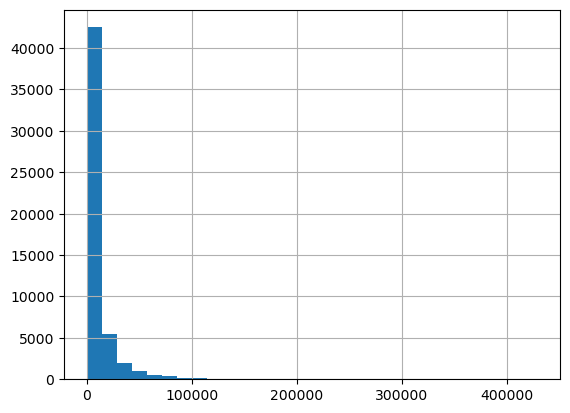

In [12]:


# Assuming 'df' is your DataFrame
# Descriptive Statistics
print(df.describe(include='all'))

# Number of unique authors
print("\nNumber of unique authors: ", df['author'].nunique())

# Top 5 most frequent authors
print("\nTop 5 most frequent authors:\n", df['author'].value_counts().head(5))

# Number of tweets per language
print("\nNumber of tweets per language:\n", df['language'].value_counts())

# Average number of likes and shares
print("\nAverage number of likes: ", df['number_of_likes'].mean())
print("Average number of shares: ", df['number_of_shares'].mean())

# Correlation between number of likes and shares
print("\nCorrelation between number of likes and shares: ", df['number_of_likes'].corr(df['number_of_shares']))

# Histogram of number of likes
df['number_of_likes'].hist(bins=30)
plt.title('Histogram of Number of Likes')
plt.xlabel('Number of Likes')
plt.ylabel('Frequency')
plt.show()

# Boxplot of number of shares
df.boxplot(column='number_of_shares')
plt.title('Boxplot of Number of Shares')
plt.ylabel('Number of Shares')
plt.show()

# Heatmap of correlations between numeric variables
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlations')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def visualize_data(processed_data):
    # Extracting time series data for likes and shares
    dates = processed_data['date_time']
    likes = processed_data['number_of_likes']
    shares = processed_data['number_of_shares']

    # Plotting time series for likes and shares
    plt.figure(figsize=(10, 5))
    plt.plot(dates, likes, label='Likes', color='blue')
    plt.plot(dates, shares, label='Shares', color='green')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.title('Time Series of Likes and Shares')
    plt.legend()
    time_series = plt.show()

    # Creating a word cloud from content
    content = processed_data['content']
    wordcloud = WordCloud(width=800, height=400).generate(' '.join(content))

    # Plotting the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud)
    plt.axis("off")
    words_cloud = plt.show()

    # Another graph can be a bar plot for the number of posts in different languages
    languages = processed_data['language'].value_counts()

    # Plotting a bar plot for languages
    languages.plot(kind='bar', figsize=(10, 5), color=['skyblue', 'salmon'])
    plt.title('Number of Posts in Different Languages')
    another_graph = plt.show()

    return time_series, words_cloud, another_graph

# You need to pass your cleaned DataFrame into this function.


In [15]:
df

,author,content,country,date_time,id,language,latitude,longitude,number_of_likes,number_of_shares
0,katyperry,is history repeating itself...?#dontnormalizeh...,NaN,12/01/2017 19:52,8.196330e+17,en,37.776973,-122.416523,7900,3472
1,katyperry,@barackobama thank you for your incredible gra...,NaN,11/01/2017 08:38,8.191010e+17,en,37.776973,-122.416523,3689,1380
2,katyperry,life goals. https://t.co/xin1qkmkql,NaN,11/01/2017 02:52,8.190140e+17,en,37.776973,-122.416523,10341,2387
3,katyperry,me right now 🙏🏻 https://t.co/gw55c1wrwd,NaN,11/01/2017 02:44,8.190120e+17,en,37.776973,-122.416523,10774,2458
4,katyperry,sisters are doin' it for themselves! 🙌🏻💪🏻❤️ ht...,NaN,10/01/2017 05:22,8.186890e+17,en,37.776973,-122.416523,17620,4655
...,...,...,...,...,...,...,...,...,...,...
52537,ddlovato,life couldn't be better right now. 😊,NaN,06/01/2015 23:10,5.526030e+17,en,37.776973,-122.416523,32799,23796
52538,ddlovato,first monday back in action. i'd say 21.6 mile...,NaN,06/01/2015 02:17,5.522880e+17,en,37.776973,-122.416523,21709,12511
52539,ddlovato,"crime shows, buddy, snuggles = the perfect sun...",NaN,05/01/2015 03:42,5.519470e+17,en,37.776973,-122.416523,25269,15583
52540,ddlovato,❄️ http://t.co/shcfdppgpa,NaN,05/01/2015 00:06,5.518920e+17,und,37.776973,-122.416523,15985,10456


In [24]:
def time_plot(processed_data):
    # Extracting time series data for likes and shares
    processed_data['date_time'] = pd.to_datetime(processed_data['date_time'])

    # Aggregate data by month
    monthly_data = processed_data.resample('M', on='date_time').sum()

    # Extract time series data for likes and shares
    dates = monthly_data.index
    likes = monthly_data['number_of_likes']
    shares = monthly_data['number_of_shares']

    # Plotting time series for likes and shares
    plt.figure(figsize=(10, 5))
    plt.plot(dates, likes, label='Likes', color='blue')
    plt.plot(dates, shares, label='Shares', color='green')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.title('Monthly Time Series of Likes and Shares')
    plt.legend()
    time_series = plt.show()

C:\Users\ygree\AppData\Local\Temp\ipykernel_35172\2255727420.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_data = processed_data.resample('M', on='date_time').sum()


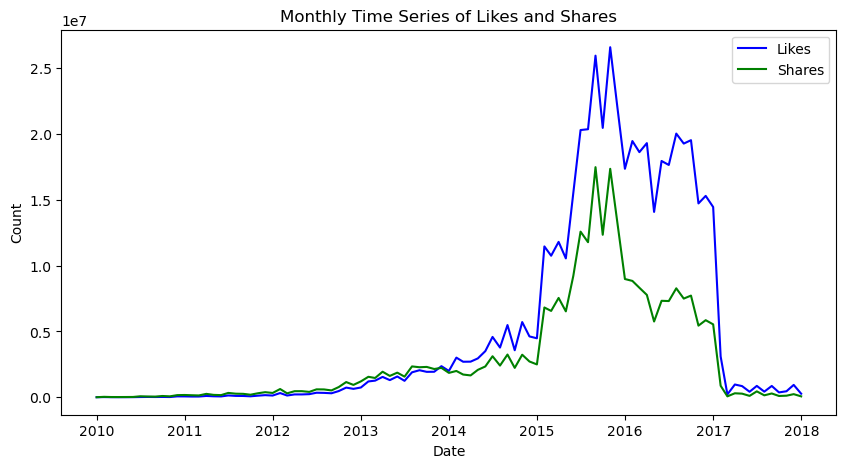

In [25]:
time_plot(df)

In [26]:
def tweets_words_cloud(processed_data):
    # read the csv data
    df = processed_data

    # download nltk stop words data
    nltk.download('punkt')
    nltk.download('stopwords')

    # combine all content into a single string
    all_text = ' '.join(df['content'])

    # tokenize the text
    words = nltk.word_tokenize(all_text.lower())

    # filter out non-alphanumeric words
    words = [word for word in words if word.isalnum()]

    # filter out stop words
    stop_words = set(nltk.stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words]

    # combine filtered words into a single string
    filtered_text = ' '.join(filtered_words)

    # generate the word cloud
    wordcloud = WordCloud(stopwords=stop_words, max_font_size=50, max_words=100, background_color='white').generate(filtered_text)

    # display the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

    return plt

In [30]:
tweets_words_cloud(df)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ygree\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ygree\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


AttributeError: module 'nltk' has no attribute 'stopwords'

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x0000027F66CFC5E0> (for post_execute):


KeyboardInterrupt: 

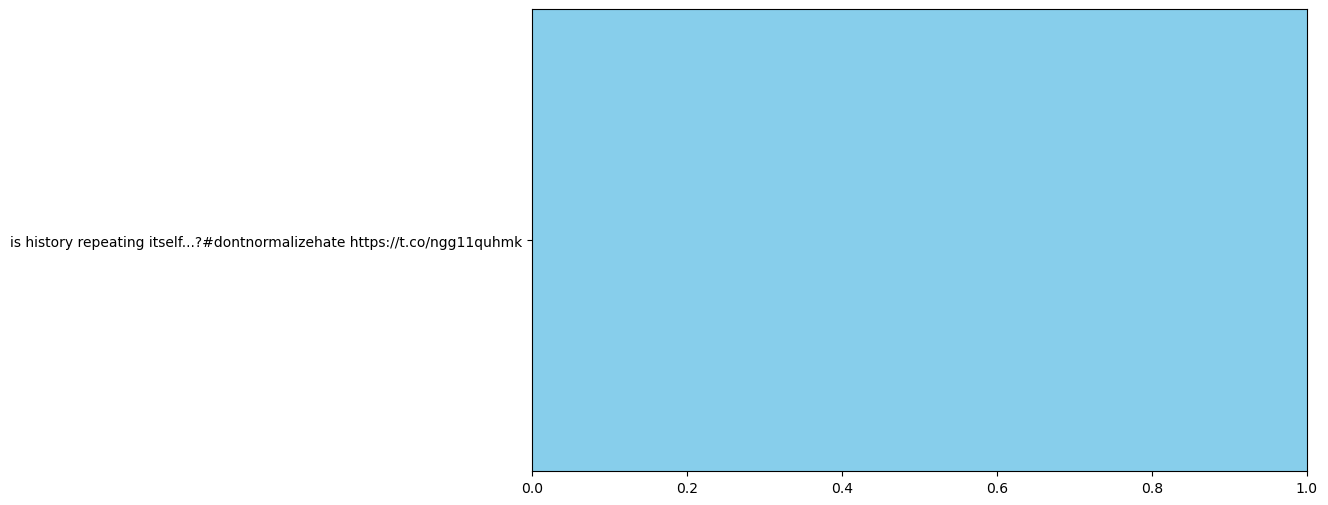

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data

# Plotting
plt.figure(figsize=(10, 6))

plt.barh(df['content'], df['number_of_likes'], color='skyblue', label='Likes')
plt.barh(df['content'], df['number_of_shares'], color='salmon', label='Shares')

plt.xlabel('Count')
plt.ylabel('Tweet Content')
plt.title('Number of Likes and Shares for Katy Perry Tweets')
plt.legend()

plt.gca().invert_yaxis()  # Invert y-axis to display the latest tweet on top
plt.tight_layout()
plt.show()


In [ ]:
df['tweet_length'] = df['content'].str.len()
# Plotting
plt.figure(figsize=(10, 6))

# Histogram of tweet lengths
plt.hist(df['tweet_length'], bins=20, color='skyblue', edgecolor='black')
plt.axvline(df['tweet_length'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean Length')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.title('Distribution of Tweet Lengths')
plt.legend()

In [ ]:

# Select the top tweets based on the number of likes or shares
top_tweets = df.nlargest(100, 'number_of_likes')  # You can change 'number_of_likes' to 'number_of_shares' if desired

# Calculate the length of each tweet
top_tweets['tweet_length'] = top_tweets['content'].str.len()

# Plotting
plt.figure(figsize=(10, 6))

# Histogram of tweet lengths
plt.hist(top_tweets['tweet_length'], bins=20, color='skyblue', edgecolor='black')
plt.axvline(top_tweets['tweet_length'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean Length')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.title('Distribution of Tweet Lengths (Top Tweets)')
plt.legend()

plt.show()


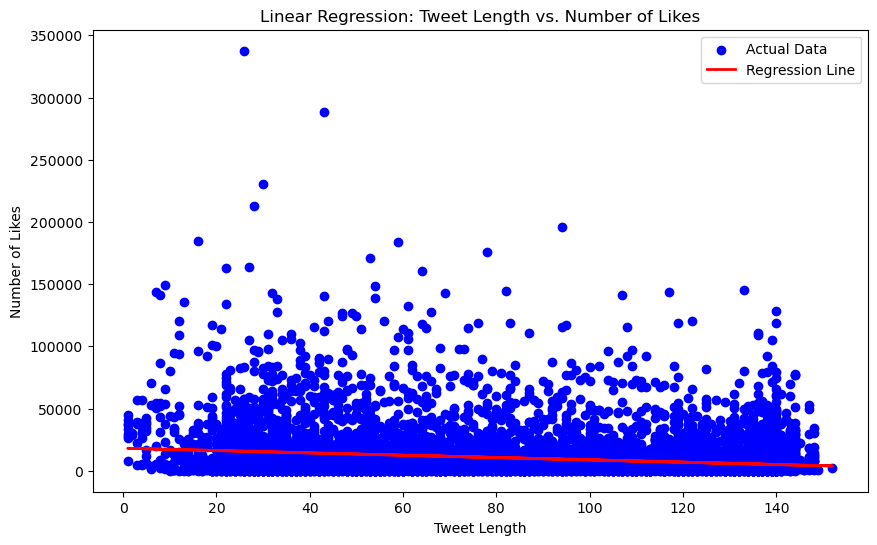

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the Kaggle tweets toy data
# Replace 'kaggle_tweets.csv' with the path to your CSV file

# Calculate the length of each tweet
df['tweet_length'] = df['content'].str.len()

# Selecting features and target variable
X = df[['tweet_length']]  # Feature: tweet length
y = df['number_of_likes']  # Target variable: number of likes

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and fitting the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the testing set
y_pred = model.predict(X_test)

# Plotting the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Tweet Length')
plt.ylabel('Number of Likes')
plt.title('Linear Regression: Tweet Length vs. Number of Likes')
plt.legend()
plt.show()
